# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
import pandas as pd
import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('telecom_users.csv')
dataset.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
dataset.info() #Проверяем тип и целостность данных (отсутствие пропусков)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [4]:
# Проверяем столбец 'Unnamed: 0' на предмет дублирования записей и наличия пропусков в номерах.
duplicateRows = dataset[dataset.duplicated(['Unnamed: 0'])]
if duplicateRows.shape[0]==0:
    print(dataset.sort_values(by='Unnamed: 0', ascending=False)['Unnamed: 0'].head())

# В столбце есть пропуски в номерах, его нельзя использовать как идентификатор записей, поэтому удаляем столбец
dataset.drop(columns=dataset.columns[0], axis= 1 , inplace= True)
df = dataset.copy()
df.head(3)

1961    7042
1152    7041
1567    7040
2318    7039
2248    7038
Name: Unnamed: 0, dtype: int64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes


In [5]:
# Проверяем столбец customerID на предмет дублирования записей
duplicateRows = df[df.duplicated(['customerID'])]
duplicateRows
# Записей с одинаковыми идентификаторами нет.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [6]:
# Проверяем столбец 'gender' на предмет правильности записей и приводим к цифрвому виду (1 -male, 0 - female)
print(df.groupby('gender')['gender'].count())
# Записей с неправильными данными нет.
df['gender'] = np.where((df.gender == 'Female'), 0, 1)
df['gender'].head()

gender
Female    2936
Male      3050
Name: gender, dtype: int64


0    1
1    0
2    0
3    1
4    1
Name: gender, dtype: int32

In [7]:
# Проверяем столбец SeniorCitizen на предмет правильности записей 
df.groupby('SeniorCitizen')['SeniorCitizen'].count()
# Записей с неправильными данными нет.


SeniorCitizen
0    5020
1     966
Name: SeniorCitizen, dtype: int64

In [8]:
# Проверяем столбец 'Partner' на предмет правильности записей и приводим к цифрвому виду (1 - Yes, 0 - No)
print(df.groupby('Partner')['Partner'].count())
# Записей с неправильными данными нет.
df['Partner']  = np.where((df.Partner == 'No'), 0, 1)
df['Partner'].head()

Partner
No     3082
Yes    2904
Name: Partner, dtype: int64


0    1
1    0
2    1
3    0
4    0
Name: Partner, dtype: int32

In [9]:
#  Проверяем столбец 'Dependents' на предмет правильности записей и приводим к цифрвому виду (1 - Yes, 0 - No)
print(df.groupby('Dependents')['Dependents'].count())
# Записей с неправильными данными нет.
df['Dependents'] = np.where((dataset.Dependents == 'No'), 0, 1)
df['Dependents'].head()

Dependents
No     4195
Yes    1791
Name: Dependents, dtype: int64


0    1
1    0
2    0
3    0
4    0
Name: Dependents, dtype: int32

In [10]:
#  Проверяем столбец 'PhoneService' на предмет правильности записей и приводим к цифрвому виду (1 - Yes, 0 - No)
print(df.groupby('PhoneService')['PhoneService'].count())
# Записей с неправильными данными нет.
df['PhoneService'] = np.where((dataset.PhoneService == 'No'), 0, 1)
df['PhoneService'].head(6)

PhoneService
No      590
Yes    5396
Name: PhoneService, dtype: int64


0    1
1    1
2    1
3    1
4    1
5    0
Name: PhoneService, dtype: int32

In [11]:
#  Проверяем столбец 'MultipleLines' на предмет правильности записей и приводим к цифрвому виду 
# (1 - Yes, 0 - No, -1 -  No phone service)
print(df.groupby('MultipleLines')['MultipleLines'].count())
# Записей с неправильными данными нет.
df['MultipleLines'] = np.where((dataset.MultipleLines == 'No phone service'), -1, np.where((dataset.MultipleLines == 'No'), 0, 1))
df['MultipleLines'].head(6)

MultipleLines
No                  2848
No phone service     590
Yes                 2548
Name: MultipleLines, dtype: int64


0    1
1    0
2    1
3    0
4    0
5   -1
Name: MultipleLines, dtype: int32

In [12]:
# InternetService – интернет-провайдер клиента (DSL, Fiber optic, No)

#  Проверяем столбец 'InternetService' на предмет правильности записей и приводим к цифрвому виду 
# (0 - No, 1 - DSL, 2 -  Fiber optic)
print(df.groupby('InternetService')['InternetService'].count())
# Записей с неправильными данными нет.
df['InternetService'] = np.where((dataset.InternetService == 'No'), 0, \
                                 np.where((dataset.InternetService == 'DSL'), 1, 2))
                                               
df['InternetService'].head()

InternetService
DSL            2068
Fiber optic    2627
No             1291
Name: InternetService, dtype: int64


0    0
1    2
2    2
3    1
4    1
Name: InternetService, dtype: int32

In [13]:
# OnlineSecurity – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)

#  Проверяем столбец 'OnlineSecurity' на предмет правильности записей и приводим к цифрвому виду 
# (1 - Yes, 0 - No, -1 -  No internet service)
print(df.groupby('OnlineSecurity')['OnlineSecurity'].count())
# Записей с неправильными данными нет.
df['OnlineSecurity'] = np.where((dataset.OnlineSecurity == 'No internet service'), -1, \
                       np.where((dataset.OnlineSecurity == 'No'), 0, 1))
df['OnlineSecurity'].head()
# print(df.groupby('OnlineSecurity')['OnlineSecurity'].count())

OnlineSecurity
No                     2982
No internet service    1291
Yes                    1713
Name: OnlineSecurity, dtype: int64


0   -1
1    0
2    0
3    0
4    1
Name: OnlineSecurity, dtype: int32

In [14]:
# OnlineBackup – подключена ли услуга online backup (Yes, No, No internet service)

#  Проверяем столбец 'OnlineBackup' на предмет правильности записей и приводим к цифрвому виду 
# (1 - Yes, 0 - No, -1 -  No internet service)
print(df.groupby('OnlineBackup')['OnlineBackup'].count())
# Записей с неправильными данными нет.
df['OnlineBackup'] = np.where((dataset.OnlineBackup == 'No internet service'), -1, \
                     np.where((dataset.OnlineBackup == 'No'), 0, 1))
df['OnlineBackup'].head()

OnlineBackup
No                     2605
No internet service    1291
Yes                    2090
Name: OnlineBackup, dtype: int64


0   -1
1    1
2    0
3    0
4    0
Name: OnlineBackup, dtype: int32

In [15]:
# DeviceProtection – есть ли у клиента страховка оборудования (Yes, No, No internet service)

#  Проверяем столбец 'DeviceProtection' на предмет правильности записей и приводим к цифрвому виду 
# (1 - Yes, 0 - No, -1 -  No internet service)
print(df.groupby('DeviceProtection')['DeviceProtection'].count())
# Записей с неправильными данными нет.
df['DeviceProtection'] = np.where((dataset.DeviceProtection == 'No internet service'), -1, \
                     np.where((dataset.DeviceProtection == 'No'), 0, 1))
df['DeviceProtection'].head()

DeviceProtection
No                     2640
No internet service    1291
Yes                    2055
Name: DeviceProtection, dtype: int64


0   -1
1    1
2    0
3    0
4    1
Name: DeviceProtection, dtype: int32

In [16]:
# TechSupport – подключена ли услуга технической поддержки (Yes, No, No internet service)

#  Проверяем столбец 'TechSupport' на предмет правильности записей и приводим к цифрвому виду 
# (1 - Yes, 0 - No, -1 -  No internet service)
print(df.groupby('TechSupport')['TechSupport'].count())
# Записей с неправильными данными нет.
df['TechSupport'] = np.where((dataset.TechSupport == 'No internet service'), -1, \
                    np.where((dataset.TechSupport == 'No'), 0, 1))
df['TechSupport'].head()

TechSupport
No                     2960
No internet service    1291
Yes                    1735
Name: TechSupport, dtype: int64


0   -1
1    0
2    0
3    0
4    0
Name: TechSupport, dtype: int32

In [17]:
# StreamingTV – подключена ли услуга стримингового телевидения (Yes, No, No internet service)

#  Проверяем столбец 'StreamingTV' на предмет правильности записей и приводим к цифрвому виду 
# (1 - Yes, 0 - No, -1 -  No internet service)
print(df.groupby('StreamingTV')['StreamingTV'].count())
# Записей с неправильными данными нет.
df['StreamingTV'] = np.where((dataset.StreamingTV == 'No internet service'), -1, \
                    np.where((dataset.StreamingTV == 'No'), 0, 1))
df['StreamingTV'].head()

StreamingTV
No                     2389
No internet service    1291
Yes                    2306
Name: StreamingTV, dtype: int64


0   -1
1    1
2    0
3    0
4    0
Name: StreamingTV, dtype: int32

In [18]:

#  StreamingMovies – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)

#  Проверяем столбец 'StreamingMovies' на предмет правильности записей и приводим к цифрвому виду 
# (1 - Yes, 0 - No, -1 -  No internet service)
print(df.groupby('StreamingMovies')['StreamingMovies'].count())
# Записей с неправильными данными нет.
df['StreamingMovies'] = np.where((dataset.StreamingMovies == 'No internet service'), -1, \
                    np.where((dataset.StreamingMovies == 'No'), 0, 1))
df['StreamingMovies'].head()


StreamingMovies
No                     2356
No internet service    1291
Yes                    2339
Name: StreamingMovies, dtype: int64


0   -1
1    0
2    0
3    1
4    0
Name: StreamingMovies, dtype: int32

In [19]:
# Contract – тип контракта клиента (Month-to-month, One year, Two year)

#  Проверяем столбец 'Contract' на предмет правильности записей и приводим к цифрвому виду 
# (0 - Month-to-month, 1 - One year, 2 -  Two year)
print(df.groupby('Contract')['Contract'].count())
# Записей с неправильными данными нет.
df['Contract'] = np.where((dataset.Contract == 'Month-to-month'), 0, \
                    np.where((dataset.Contract == 'One year'), 1, 2))
df['Contract'].head()

Contract
Month-to-month    3269
One year          1276
Two year          1441
Name: Contract, dtype: int64


0    2
1    0
2    0
3    0
4    0
Name: Contract, dtype: int32

In [20]:
#  PaperlessBilling – пользуется ли клиент безбумажным биллингом (Yes, No)

#  Проверяем столбец 'PaperlessBilling' на предмет правильности записей и приводим к цифрвому виду (1 - Yes, 0 - No)
print(df.groupby('PaperlessBilling')['PaperlessBilling'].count())
# Записей с неправильными данными нет.
df['PaperlessBilling'] = np.where((dataset.PaperlessBilling == 'No'), 0, 1)
df['PaperlessBilling'].head()

PaperlessBilling
No     2458
Yes    3528
Name: PaperlessBilling, dtype: int64


0    0
1    1
2    1
3    1
4    0
Name: PaperlessBilling, dtype: int32

In [21]:
#  PaymentMethod – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

#  Проверяем столбец 'PaymentMethod' на предмет правильности записей и приводим к цифрвому виду 
# (0 - Electronic check, 1 - Mailed check, 2 -  Bank transfer (automatic), 3 - Credit card (automatic))
print(df.groupby('PaymentMethod')['PaymentMethod'].count())
# Записей с неправильными данными нет.
df['PaymentMethod'] = np.where((dataset.PaymentMethod == 'Electronic check'), 0, \
                      np.where((dataset.PaymentMethod == 'Mailed check'), 1, \
                      np.where((dataset.PaymentMethod == 'Bank transfer (automatic)'), 2, 3)))
                    
df['PaymentMethod'].head()

PaymentMethod
Bank transfer (automatic)    1308
Credit card (automatic)      1303
Electronic check             2006
Mailed check                 1369
Name: PaymentMethod, dtype: int64


0    3
1    3
2    2
3    0
4    0
Name: PaymentMethod, dtype: int32

In [22]:
# сперва переведем столбце TotalCharges в числовой формат
# выявим наличие значений Nan в этом столбце и присвоим этим ячейкам значение из столбца 'tenure' умноженное на значение из 
# столбца 'MonthlyCharges'.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = np.where(df.TotalCharges.isna(), df.tenure * df.MonthlyCharges, df.TotalCharges)
print(df['TotalCharges'].isna().sum())

0


In [23]:
# Проверим столбцы tenure, MonthlyCharges и TotalCharges на наличие выбросов (реальность min и max) 
# и определим статистические характеристики

df[['tenure', 'MonthlyCharges', 'TotalCharges']] .describe()


,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000
mean,32.468760,64.802213,2294.221559
std,24.516391,30.114702,2274.164124
min,0.000000,18.250000,0.000000
25%,9.000000,35.650000,401.587500
50%,29.000000,70.400000,1408.575000
75%,56.000000,89.900000,3841.500000
max,72.000000,118.750000,8684.800000


In [24]:
# Churn – произошел ли отток (Yes or No)

#  Проверяем столбец 'Churn' на предмет правильности записей и приводим к цифрвому виду (1 - Yes, 0 - No)
print(df.groupby('Churn')['Churn'].count())
# Записей с неправильными данными нет.
df['Churn'] = np.where((dataset.Churn == 'No'), 0, 1)
df['Churn'].head()

Churn
No     4399
Yes    1587
Name: Churn, dtype: int64


0    0
1    0
2    1
3    0
4    0
Name: Churn, dtype: int32

In [25]:
# Проверим отсутствие противоречивости данных. У клиентов, у которых нет интернет сервиса не должно быть 
# услуг связанных с интернетом
# Из анализа столбца 'InternetService' видно, что интернет отключен у 1291 клиента. Аналогичное значение в столбцах 
# 'OnlineSecurity'. 'OnlineBackup ', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'. Проверим
# синхронизацию данных. В тех строках, где указано об отсутствие интернета, в столбцах, указывающих на интернет функции 
# так же должно быть отмечено отсутствие интернета.


df[(df['InternetService'] == 0) & (df['OnlineBackup'] == df['DeviceProtection']) & \
   (df['TechSupport'] == df['StreamingTV']) & (df['StreamingMovies'] == -1) & 
   (df['OnlineSecurity'] == -1)].count()['customerID']


1291

In [26]:
# Все шесть столбцов связанных с интернетом синхронно отражают информацию об его отсутствии.

# Аналогично проверим синхронизацию информации об отсутствии услуг телефонной связи (столбец 'PhoneService') и подключении 
#  нескольких телефонных линий (столбец 'MultipleLines').
print(df.groupby('PhoneService')['PhoneService'].count())
df[(df['PhoneService'] == 0) & (df['MultipleLines'] == -1)].count()['customerID']

PhoneService
0     590
1    5396
Name: PhoneService, dtype: int64


590

In [27]:
# Данные проверены, оцифрованы, можно приступать к их графическому анализу

# 2. Исследование зависимостей и формулирование гипотез

In [28]:
# Запоминаем идентификаторы клиентов в отдельный датасет и удаляем соответствующий столбец из набора данных

customeres =  df['customerID']
df.drop(columns=df.columns[0], axis= 1 , inplace= True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,-1,-1,-1,-1,-1,-1,2,0,3,24.10,1734.65,0
1,0,0,0,0,44,1,0,2,0,1,1,0,1,0,0,1,3,88.15,3973.20,0
2,0,1,1,0,38,1,1,2,0,0,0,0,0,0,0,1,2,74.95,2869.85,1
3,1,0,0,0,4,1,0,1,0,0,0,0,0,1,0,1,0,55.90,238.50,0
4,1,0,0,0,2,1,0,1,1,0,1,0,0,0,0,0,0,53.45,119.50,0


<AxesSubplot:title={'center':'Корреляция данных между собой'}>

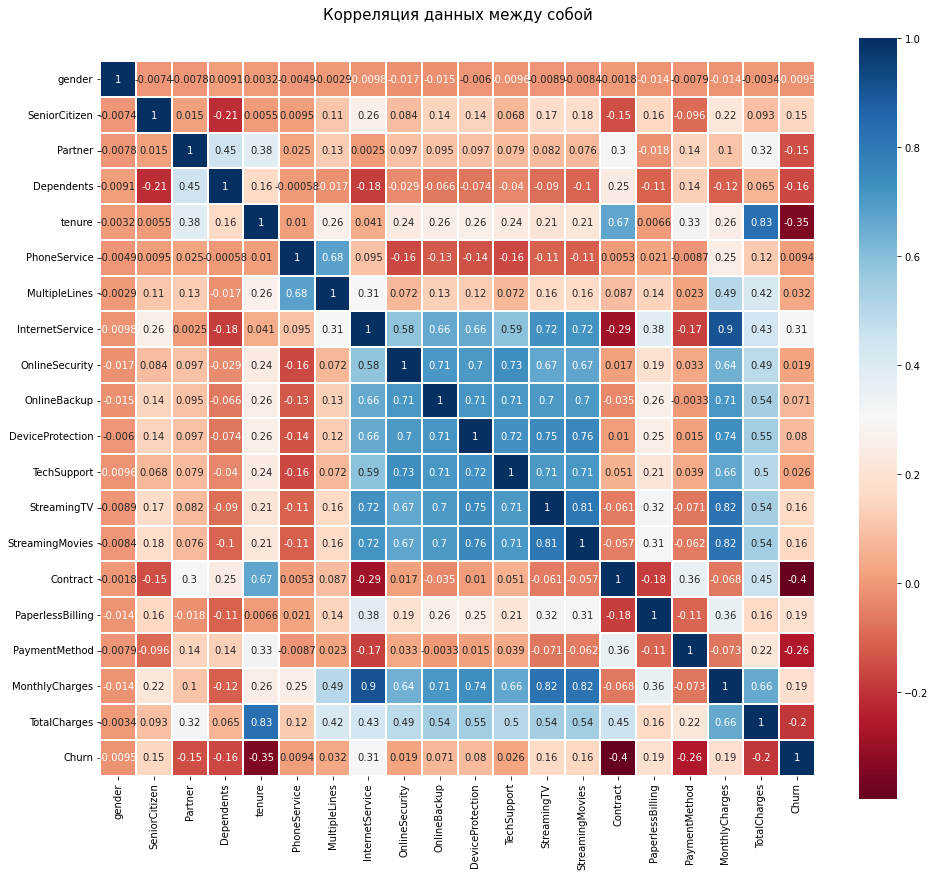

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

colormap = plt.cm.RdBu
plt.figure(figsize=(16,14))
plt.title('Корреляция данных между собой', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [29]:
# Как видно из таблицы взаимных корреляций, наиболее зависимыми являются размер ежемесячной оплаты и 
# наличие подключенных интернет-услуг.  Так же связаны между собой ежемесячная оплата и общая оплата за весь период. 
# Прослеживается связь между отдельными интернет-услугами. Можно предположить, что клиенты, подключающие интернет-сервисы,
# как правило берут комплект услуг, включающий онлайнТВ, кинотеатр и др. Для упрощенного анализа можно ограничиться 
# фактом подключения интернет-сервисов, отказавшись от анализа конкретных услуг.

In [30]:
# Посмотрим как распределены данные относительно друг друга

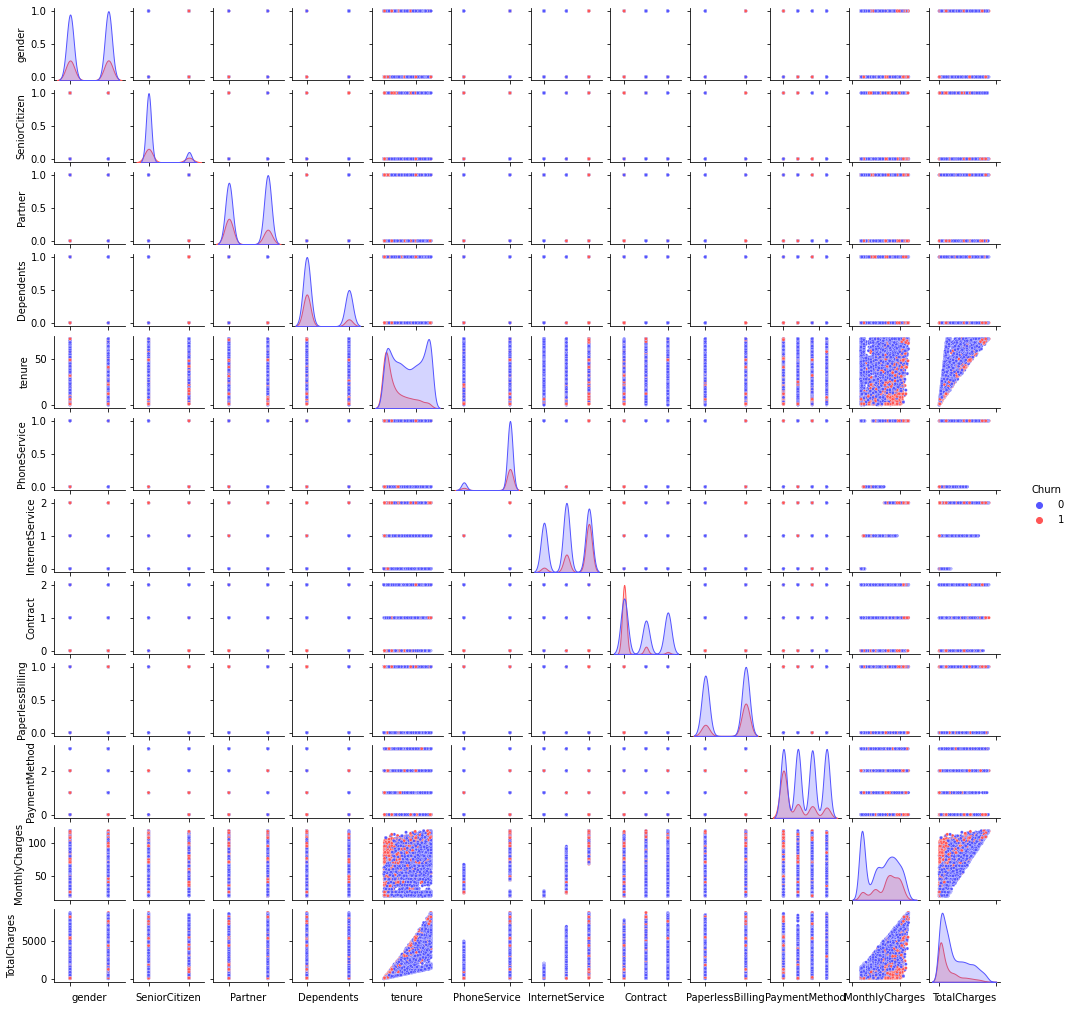

In [28]:
g = sns.pairplot(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'InternetService',
                      'Contract','PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']], 
                 hue='Churn', palette = 'seismic', size=1.2, plot_kws=dict(s=10))
g.set(xticklabels=[])

C:\Users\vpsma\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


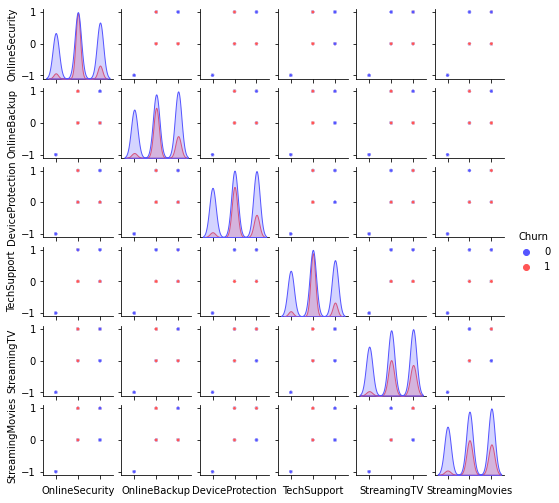

In [80]:
g = sns.pairplot(df[[
'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']], 
                 hue='Churn', palette = 'seismic', size=1.2, plot_kws=dict(s=10))
g.set(xticklabels=[])

# 3. Построение моделей для прогнозирования оттока

In [29]:
from sklearn.model_selection import train_test_split

# Выделим из датасета описательную часть(х) и целевую (у)

df_y = df['Churn']
df_x = df.iloc[:,0:19]
# Делим данные на тренировочные и тестовые (отложенные)
x_train, x_test, y_train, y_test = train_test_split(df_x, 
                                                    df_y,
                                                    train_size=0.8,
                                                    random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print(type(x_train), type(x_test), type(y_train), type(y_test))
x_train.info()

(4788, 19) (1198, 19) (4788,) (1198,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4788 entries, 5426 to 2732
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4788 non-null   int32  
 1   SeniorCitizen     4788 non-null   int64  
 2   Partner           4788 non-null   int32  
 3   Dependents        4788 non-null   int32  
 4   tenure            4788 non-null   int64  
 5   PhoneService      4788 non-null   int32  
 6   MultipleLines     4788 non-null   int32  
 7   InternetService   4788 non-null   int32  
 8   OnlineSecurity    4788 non-null   int32  
 9   OnlineBackup      4788 non-null   int32  
 10  DeviceProtection  4788 non-null   int32  
 11  TechSupport       4788 non-null   int32  
 12  StreamingTV       4788 non-null   int32  

In [30]:
# Так как нам нужно и обучить базовые алгоритмы на тренировочном сете, и сделать на этих же данных предсказания для обучения 
# мета-алгоритма, разделим тренировочные данные еще на два датасета: train и valid.

train, valid, train_true, valid_true = train_test_split(x_train, 
                                                        y_train,
                                                        train_size=0.8,
                                                        random_state=0)

In [ ]:
# Посмотрим какие результаты дадут базовые алгоритмы

In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# import pandas as pd
# import numpy as np


# Обучим базовые алгоритмы. И определяем auc для каждого
# 1
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(x_train, y_train)
print(f'knn1 auc: {roc_auc_score(knn1.predict(x_test), y_test)}') 
# 2
knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(x_train, y_train)
print(f'knn2 auc: {roc_auc_score(knn2.predict(x_test), y_test)}') 
# 3
lr = LogisticRegression(C=10, random_state=17)
lr.fit(x_train, y_train)
print(f'lr auc: {roc_auc_score(lr.predict(x_test), y_test)}') 
# 4
rf1 = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=17)
rf1.fit(x_train, y_train)
y_score = rf1.predict_proba(x_test)[:, 1]
print(f'rf1 auc: {roc_auc_score(y_test, y_score)}') 
# print(f'rf1 auc: {roc_auc_score(rf1.predict(x_test), y_test)}') 
# print(f'rf1 auc: {roc_auc_score(y_test, rf1.decision_function(x_test))}') 

# 5
rf2 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=17)
rf2.fit(x_train, y_train)
print(f'rf2 auc: {roc_auc_score(rf2.predict(x_test), y_test)}') 
# 6
rf3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=17)
rf3.fit(x_train, y_train)
print(f'rf3 auc: {roc_auc_score(rf3.predict(x_test), y_test)}') 
# 7
gb1 = GradientBoostingClassifier(learning_rate=0.1, random_state=17)
gb1.fit(x_train, y_train)
print(f'gb1 auc: {roc_auc_score(gb1.predict(x_test), y_test)}') 
# 8
gb2 = GradientBoostingClassifier(learning_rate=0.4, random_state=17)
gb2.fit(x_train, y_train)
print(f'gb2 auc: {roc_auc_score(gb2.predict(x_test), y_test)}')  
# 9
dtc = DecisionTreeClassifier(max_leaf_nodes=4, random_state=17)
dtc_model = dtc.fit(x_train, y_train)
print(f'dtc auc: {roc_auc_score(dtc.predict(x_test), y_test)}') 
# 10
svc = SVC(random_state=17, probability=False)
svc_model = svc.fit(x_train, y_train)
y_score = svc.decision_function(x_test)
print(f'svc auc: {roc_auc_score(y_test,y_score)}') 

knn1 auc: 0.6530896077753604
knn2 auc: 0.7203936827649348
lr auc: 0.7738880918220946
rf1 auc: 0.8153858598932211
rf2 auc: 0.7627621471725401
rf3 auc: 0.7458341134618984
gb1 auc: 0.7455871002382629
gb2 auc: 0.7163716831865419
dtc auc: 0.7584000173840295
svc auc: 0.7827356235057255


In [35]:
# Результаты работы базовых алгоритмов.

# knn1 auc: 0.6530896077753604
# knn2 auc: 0.7203936827649348
# lr auc: 0.7738880918220946
# rf1 auc: 0.8153858598932211
# rf2 auc: 0.7627621471725401
# rf3 auc: 0.7458341134618984
# gb1 auc: 0.7455871002382629
# gb2 auc: 0.7163716831865419
# dtc auc: 0.7584000173840295
# svc auc: 0.7827356235057255

In [32]:
# Посчитаем результаты работы базовых алгоритмов с параметрами по умолчанию

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print(f'knn auc: {roc_auc_score(knn.predict(x_test), y_test)}') 

lr = LogisticRegression()
lr.fit(x_train, y_train)
print(f'lr auc: {roc_auc_score(lr.predict(x_test), y_test)}') 

rf = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=17)
rf.fit(x_train, y_train)
y_score = rf.predict_proba(x_test)[:, 1]
print(f'rf auc: {roc_auc_score(y_test, y_score)}') 

gb = GradientBoostingClassifier(learning_rate=0.1, random_state=17)
gb.fit(x_train, y_train)
print(f'gb auc: {roc_auc_score(gb.predict(x_test), y_test)}') 

dtc = DecisionTreeClassifier(max_leaf_nodes=4, random_state=17)
dtc_model = dtc.fit(x_train, y_train)
print(f'dtc auc: {roc_auc_score(dtc.predict(x_test), y_test)}') 

svc = SVC(random_state=17, probability=False)
svc_model = svc.fit(x_train, y_train)
y_score = svc.decision_function(x_test)
print(f'svc auc: {roc_auc_score(y_test,y_score)}') 

knn auc: 0.6605800262439268
lr auc: 0.771068554928298
rf auc: 0.8153858598932211
gb auc: 0.7455871002382629
dtc auc: 0.7584000173840295
svc auc: 0.7827356235057255


In [ ]:
# Результаты работы базовых алгоритмов с параметрами по умолчанию

# knn auc: 0.6605800262439268
# lr auc: 0.771068554928298
# rf auc: 0.817663448920527
# gb auc: 0.7469677783059946
# dtc auc: 0.7584000173840295
# svc auc: 0.7827356235057255

In [33]:
# Определим оптимальные параметры для четырех базовых алгоритмов

# Установим пределы изменения и шаг изменения параметров для отдельных базовых алгоритмов
knn_params ={'n_neighbors': np.arange(1, 10, 1)}

lr_params = {'C': np.arange(0.5, 1, 0.1)}

rfc_params = {'n_estimators': range(10, 100, 10),  # RandomForestClassifier \
              'min_samples_leaf': range(1, 5)}

dtc_params = {'max_leaf_nodes': range(1, 5)} # DecisionTreeClassifier

gb_params ={'learning_rate': np.arange(0.1, 1, 0.1)}

svc_params = {'kernel': ['linear', 'rbf'],  # SVC
              'C': np.arange(.1, 1.0, .2)}



skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

In [39]:
# Рассчитаем оптимальные параметры 


from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression    
from sklearn.model_selection import StratifiedKFold

from xgboost import XGBClassifier

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, knn_params, cv=skf) 

lr = LogisticRegression()
grid_search_lr = GridSearchCV(lr, lr_params, cv=skf)

rfc = RandomForestClassifier()
grid_search_rfc = GridSearchCV(rfc, rfc_params, cv=skf)

gb = GradientBoostingClassifier()
grid_search_gb = GridSearchCV(gb, gb_params, cv=skf)

dtc = DecisionTreeClassifier()
grid_search_dtc = GridSearchCV(dtc, dtc_params, cv=skf)

svc = SVC()
grid_search_svc = GridSearchCV(svc, svc_params, cv=skf)

In [40]:
knn_best = grid_search_knn.fit(x_train, y_train)
lr_best = grid_search_lr.fit(x_train, y_train)
rfc_best = grid_search_rfc.fit(x_train, y_train)
gb_best =  grid_search_gb.fit(x_train, y_train)
dtc_best = grid_search_dtc.fit(x_train, y_train)
svc_best = grid_search_svc.fit(x_train, y_train)


print('Лучшее сочетание параметров для каждого из алгоритмов')
print('KNeighborsClassifier: ', knn_best.best_params_ )
print('LogisticRegression: ', lr_best.best_params_ )
print('RandomForestClassifier: ', rfc_best.best_params_ )
print('GradientBoostingClassifier: ', gb_best.best_params_ )
print('DecisionTreeClassifier: ', dtc_best.best_params_ )
print('SVC: ', svc_best.best_params_ )


Лучшее сочетание параметров для каждого из алгоритмов
KNeighborsClassifier:  {'n_neighbors': 8}
LogisticRegression:  {'C': 0.8999999999999999}
RandomForestClassifier:  {'min_samples_leaf': 4, 'n_estimators': 20}
GradientBoostingClassifier:  {'learning_rate': 0.1}
DecisionTreeClassifier:  {'max_leaf_nodes': 4}
SVC:  {'C': 0.1, 'kernel': 'linear'}


In [41]:
# Лучшее сочетание параметров для каждого из алгоритмов

# KNeighborsClassifier:  {'n_neighbors': 8}
# LogisticRegression:  {'C': 0.8999999999999999}
# RandomForestClassifier:  {'min_samples_leaf': 4, 'n_estimators': 70}
# GradientBoostingClassifier:  {'learning_rate': 0.1}
# DecisionTreeClassifier:  {'max_leaf_nodes': 4}
# SVC:  {'C': 0.1, 'kernel': 'linear'}



In [59]:
from sklearn.metrics import accuracy_score
print('Метрика качества для каждого из алгоритмов')
print('KNeighborsClassifier: ', accuracy_score(y_train, knn_best.predict(x_train)))
print('LogisticRegression: ', accuracy_score(y_train, lr_best.predict(x_train)))
print('RandomForestClassifier: ', accuracy_score(y_train, rfc_best.predict(x_train)))
print('GradientBoostingClassifier: ', accuracy_score(y_train, gbc_best.predict(x_train)))
print('DecisionTreeClassifier: ', accuracy_score(y_train, dtc_best.predict(x_train)))
print('SVC: ', accuracy_score(y_train, svc_best.predict(x_train)))


Метрика качества для каждого из алгоритмов
KNeighborsClassifier:  0.8130743525480367
LogisticRegression:  0.7984544695071011
RandomForestClassifier:  0.8774018379281537
GradientBoostingClassifier:  0.829156223893066
DecisionTreeClassifier:  0.7878028404344194
SVC:  0.7982456140350878


In [40]:
# Метрика качества для каждого из алгоритмов

#                              Лучшие параметры       Параметры по умолчанию   

# KNeighborsClassifier:        0.8130743525480367     0.6605800262439268          0.7203936827649348     
# LogisticRegression:          0.7984544695071011     0.771068554928298           0.7738880918220946    
# RandomForestClassifier:      0.8826232247284879     0.817663448920527           0.8153858598932211
# GradientBoostingClassifier:  0.829156223893066      0.7469677783059946          0.7455871002382629
# DecisionTreeClassifier:      0.7878028404344194     0.7584000173840295          0.7584000173840295
# SVC:                         0.7982456140350878     0.7827356235057255          0.7827356235057255


# Параметры из учебных заданий

# knn1 auc: 0.6530896077753604
# knn2 auc: 0.7203936827649348
# lr auc:   0.7738880918220946
# rf1 auc:  0.8153858598932211
# rf2 auc:  0.7627621471725401
# rf3 auc:  0.7458341134618984
# gb1 auc:  0.7455871002382629
# gb2 auc:  0.7163716831865419
# dtc auc:  0.7584000173840295
# svc auc:  0.7827356235057255


In [ ]:
# Создаем функцию для проведения стекинга
def stacking(models, meta_alg, data_train, targets_train, data_test, targets_test=None, random_state=None, \
             test_size=None, cv=5):
    
    #     Описание параметров функцииЖ

# models - список моделей базовых алгоритмов
# meta_alg - метаалгоритм 
# data_train, targets_train, data_test, targets_test  тренировочные и тестовые данные. По умолчанию предполагается 
#         что тестовые целевые данные отсутствуют  
# random_state=None - устанавливает начальное значение генератора случайных чисел при перемешивании данных при разбиении \
#             на тренировочные и проверочные в  функции train_test_split
# test_size=None устанавливает размер тестового набора данных
# cv=5 количество блоков при кросс-валидации
    
    if test_size is None: 
        # Применяем кросс-валидацию (не будем делить тренировочные данные еще раз на тренировочные 
        #         и валидационные)
        meta_mtrx = np.empty((data_train.shape[0], len(models))) # определение матрицы meta_mtrx 
            
        for n, model in enumerate(models):    
            # Заполнение матрицы meta_mtrx     
            meta_mtrx[:, n] = cross_val_predict(estimator = model, 
                            X = data_train,            
                            y = targets_train,         
                            cv = cv,                   
                            method='predict');         

            predicted = model.fit(data_train, targets_train); # тренировка базовых методов
          
        meta = meta_alg
        meta_model = meta.fit(meta_mtrx, targets_train) # Тренируем мета алгоритм на полученной мета-матрице
        
        meta_mtrx_test = np.empty((data_test.shape[0], len(models))) # Создаем тестовую мета-матрицу

        for n, model in enumerate(models):
            meta_mtrx_test[:, n] = model.predict(data_test) # Заполняем тестовую мета-матрицу

        meta_predict = meta.predict(meta_mtrx_test) # Делаем предсказание на тестовых данных
        
        if targets_test is None: # Проверяем возможность оценки полученных результатов
            return print("Нет данных для проверки")
            
        return print('meta_predict \n', meta_predict,  '\n Мета auc: ', roc_auc_score(meta_predict, targets_test))    
    
    elif test_size > 0 and test_size < 1: # Применяем стекинг
        train, valid, train_true, valid_true = train_test_split(x_train, 
                                                        y_train,
                                                        train_size=test_size,
                                                        random_state=random_state)
        meta_mtrx = np.empty((valid.shape[0], len(models))) # определение матрицы meta_mtrx 
        
        for n, model in enumerate(models):
            predicted = model.fit(train, train_true) # тренируем базовые алгоритмы
            meta_mtrx[:, n] = model.predict(valid) # заполняем мета матрицу

        meta = meta_alg
        meta_model = meta.fit(meta_mtrx, valid_true) # Тренируем мета-алгоритм
        
        meta_mtrx_test = np.empty((data_test.shape[0], len(models)))  # Создаем тестовую мета-матрицу

        for n, model in enumerate(models):
            meta_mtrx_test[:, n] = model.predict(data_test) # Заполняем тестовую мета-матрицу

        meta_predict = meta.predict(meta_mtrx_test) # Делаем предсказания на тестовой мета-матрице
        
        
        if targets_test is None: # Проверяем наличие возможности определить точность результата
            return print("Нет данных для проверки")
            
        return print('meta_predict \n', meta_predict,  '\n Мета auc: ', roc_auc_score(meta_predict, targets_test))   
        
    
    else:
        raise ValueError("test_size must be between 0 and 1")

# 4. Сравнение качества моделей 

In [ ]:
### YOUR CODE HERE ###


